# Team 3 - Merchant Category Recommendation

# Train a 2 Hidden Layer Dense Network

### Team 3

* Vinicio De Sola
* Kevin Hanna
* Pri Nonis
* Bradley Nott

Here we add engineer new features and write the files out to:

    - input/engineered_train.pkl
    - input/engineered_test.pkl

In [1]:
%matplotlib inline

import numpy                  as np
import matplotlib.pyplot      as plt
import pandas                 as pd
import matplotlib.pyplot      as plt
import matplotlib             as mpl
import tensorflow             as tf
import cPickle                as pickle
import math
import managers


from datetime                 import timedelta, datetime

from sklearn                  import metrics
from sklearn.decomposition    import PCA, SparsePCA, MiniBatchSparsePCA
from sklearn.cluster          import KMeans
from sklearn.mixture          import GaussianMixture
from sklearn.linear_model     import LinearRegression
from sklearn.metrics          import mean_squared_error
from sklearn.model_selection  import KFold
from sklearn.preprocessing    import StandardScaler

from matplotlib.colors        import LogNorm
from IPython.display          import display, HTML, Markdown

import warnings

warnings.filterwarnings('ignore')
np.random.seed(0)

# Plot formats
from cycler import cycler
import matplotlib.patches as patches
import matplotlib.mlab as mlab
import matplotlib.dates
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.color'] = 'blue'
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#30a2da', '#e5ae38', '#fc4f30', '#6d904f', '#8b8b8b'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams['axes.facecolor'] = '#f0f0f0'
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['axes.labelpad'] = 0.0
mpl.rcParams['axes.xmargin'] = 0.05  # x margin.  See `axes.Axes.margins`
mpl.rcParams['axes.ymargin'] = 0.05  # y margin See `axes.Axes.margins`
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['figure.subplot.left'] = 0.08
mpl.rcParams['figure.subplot.right'] = 0.95
mpl.rcParams['figure.subplot.bottom'] = 0.07

# Figure configuration
fsize = (10,7.5) # figure size
tsize = 18 # title font size
lsize = 16 # legend font size
csize = 14 # comment font size
grid = True # grid


import os
print(os.listdir("./input"))

['Data_Dictionary.xlsx', 'engineered_test.pkl', 'engineered_train.pkl', 'features_importance_kfold.pkl', 'historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'selected_test.pkl', 'selected_train.pkl', 'test.csv', 'train.csv']


## Read in all the data files

In [25]:
train        = pd.read_csv('input/selected_train.csv')
test         = pd.read_csv('input/selected_test.csv')
target       = pd.read_csv('input/target.csv')['target']
del train['card_id']

## Train the NN

Training
Epoch 1, Test set loss = 2.05e+06 and test set accuracy of 0


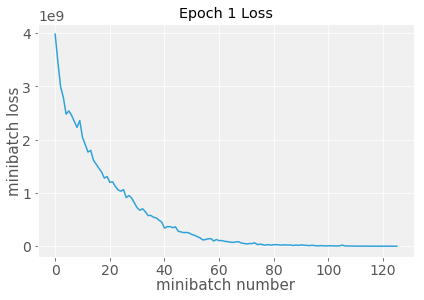

Epoch 2, Test set loss = 1.4e+03 and test set accuracy of 0


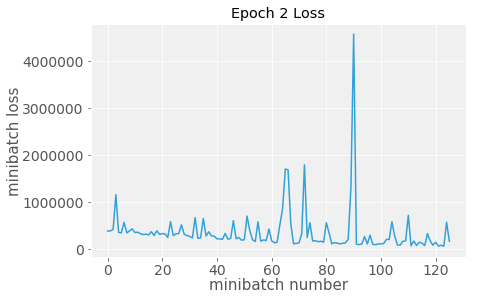

Epoch 3, Test set loss = 2.35e+03 and test set accuracy of 0


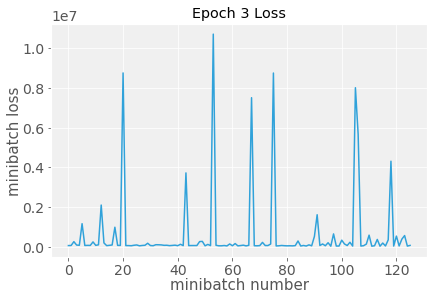

Epoch 4, Test set loss = 756 and test set accuracy of 0


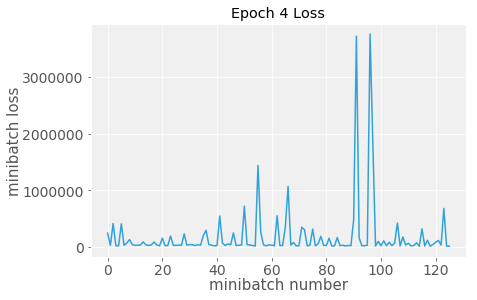

Epoch 5, Test set loss = 518 and test set accuracy of 0


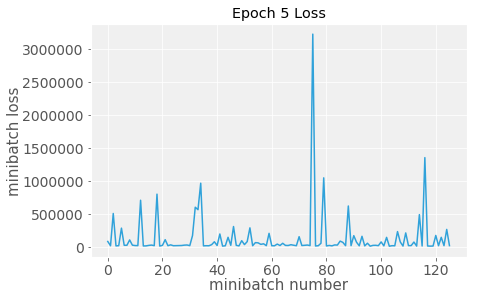

Epoch 6, Test set loss = 648 and test set accuracy of 0


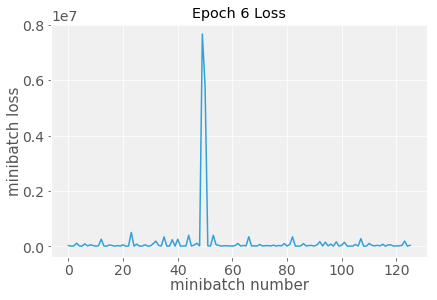

Epoch 7, Test set loss = 591 and test set accuracy of 0


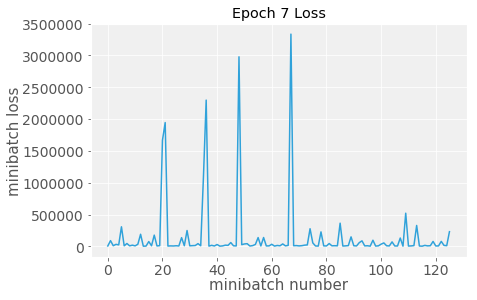

Epoch 8, Test set loss = 393 and test set accuracy of 0


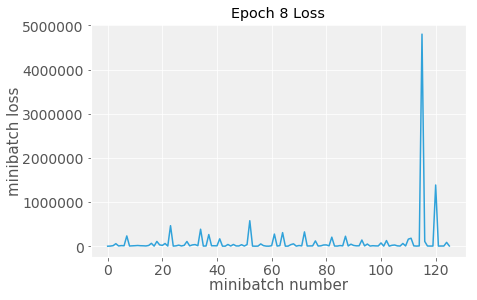

Epoch 9, Test set loss = 483 and test set accuracy of 0


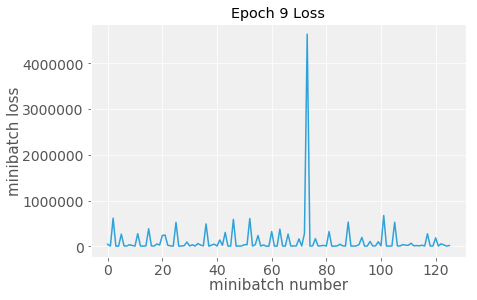

Epoch 10, Test set loss = 1.23e+03 and test set accuracy of 0


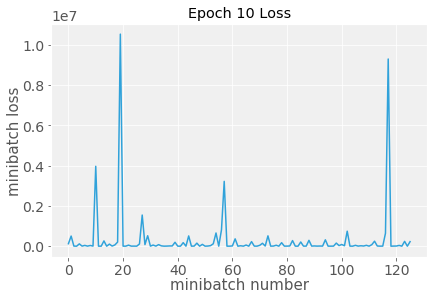

Epoch 11, Test set loss = 798 and test set accuracy of 0


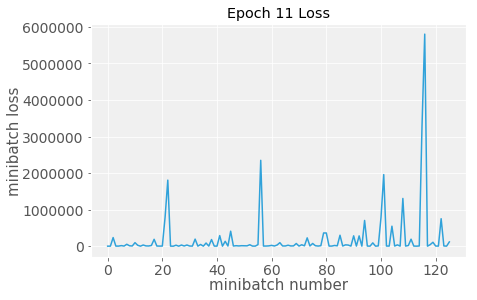

Epoch 12, Test set loss = 710 and test set accuracy of 0


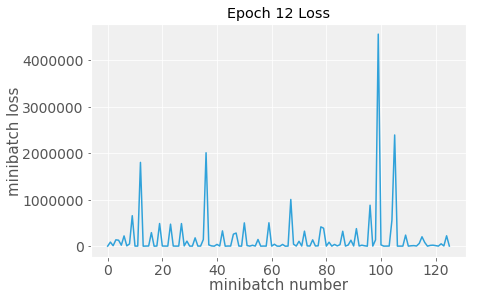

Epoch 13, Test set loss = 1.07e+03 and test set accuracy of 0


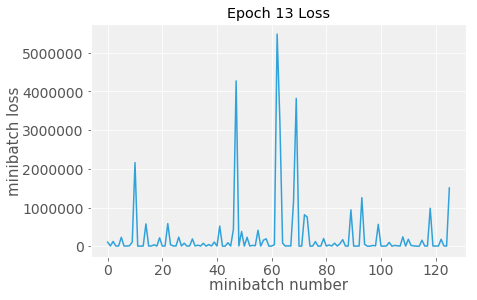

Epoch 14, Test set loss = 715 and test set accuracy of 0


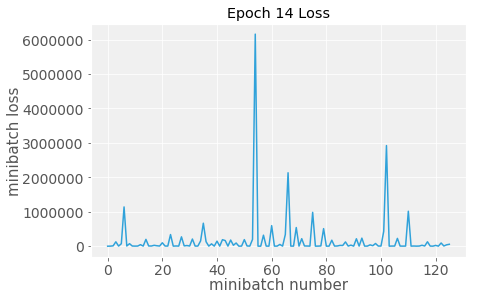

Epoch 15, Test set loss = 889 and test set accuracy of 0


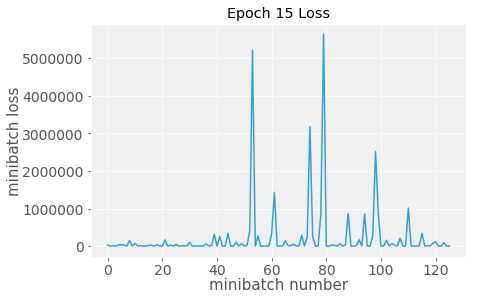

Epoch 16, Test set loss = 483 and test set accuracy of 0


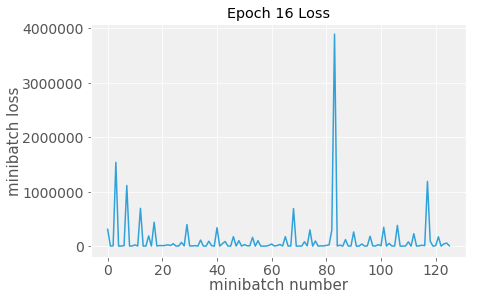

Epoch 17, Test set loss = 503 and test set accuracy of 0


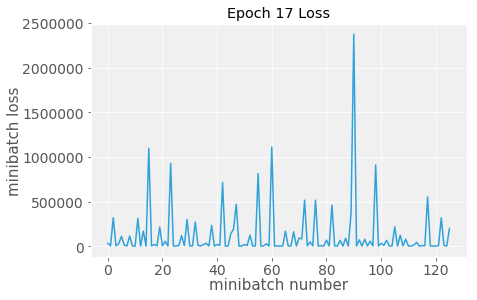

Epoch 18, Test set loss = 847 and test set accuracy of 0


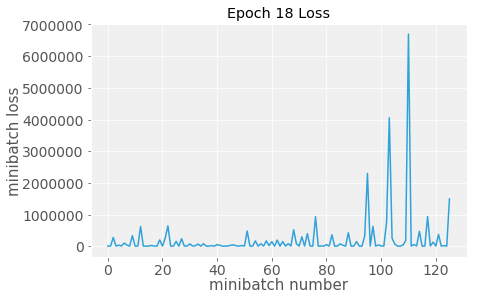

Epoch 19, Test set loss = 1.17e+03 and test set accuracy of 0


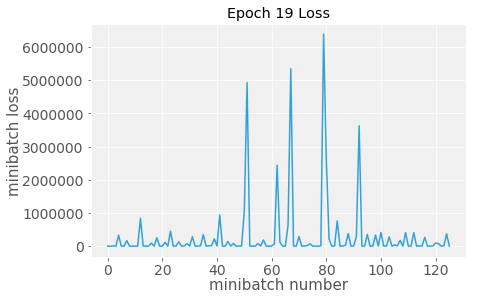

Epoch 20, Test set loss = 899 and test set accuracy of 0


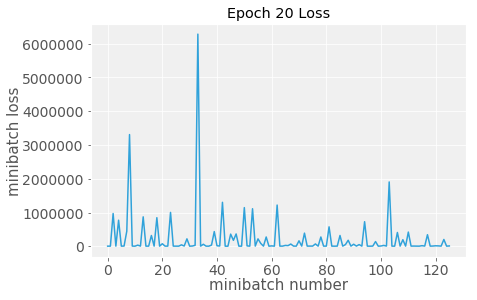

Training Complete!


In [43]:
np.random.seed(0) 


data_len = len(train)
mask = np.random.rand(data_len) < 0.8

train_data = train.values[mask]
train_labels = target.values.flatten()[mask]
val_data = train.values[~mask]
val_labels = target.values.flatten()[~mask]

X = train_data
y = train_labels

X_val = val_data
y_val = val_labels

K = len(y)
D = X.shape[1]
N = X.shape[0]

# Let's define the L2 regularization parameter
alpha = 1
H1 = D


# Regularization factor into the log on x entropy to prevent log(0)
epsilon = 1e-6  
LR = 1e-4
lRelu = -0.001

# Clear old variables
tf.reset_default_graph()

# Create the simple Tensorflow Graph for a multiclass Softmax Regression with Regularization
X_net = tf.placeholder(tf.float32, [None,D], name='X')
y_net = tf.placeholder(tf.int32, [None], name='y')
is_training = tf.placeholder(tf.bool)
p_keep_hidden=tf.placeholder(tf.float32)

def dense_one_layer(X,y):
    
    W1=tf.Variable(tf.truncated_normal(shape=[D,H1],stddev=0.01,dtype=tf.float32))
    W2=tf.Variable(tf.truncated_normal(shape=[H1,K],stddev=0.01,dtype=tf.float32))
    
    b1=tf.Variable(tf.ones(shape=[H1],dtype=tf.float32))
    b2=tf.Variable(tf.ones(shape=[K],dtype=tf.float32))
        
    # First hidden layer, with Leaky Relu
    h1 = tf.matmul(X,W1) + b1
    a1 = tf.maximum(h1,lRelu*h1)   
    a1=tf.nn.dropout(a1,p_keep_hidden)
    
    # Softmax score
    y_out = tf.matmul(a1,W2) + b2
    
    return y_out

y_out= dense_one_layer(X_net,y_net)
total_loss = tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(y_net,depth=K),logits=y_out)
mean_loss = tf.reduce_mean(total_loss)

# Set up the optimizer 
optimizer = tf.train.RMSPropOptimizer(LR)
train_step = optimizer.minimize(mean_loss)

# A handy wrapper for running minibatch models with some output monitoring
def run_model(session, predict, loss_val, Xd, yd, X_valid, y_valid, epochs=1, batch_size=2**8, print_every=100, training=None, 
              plot_losses=True,dropout=1):
    # Have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1,output_type=tf.int32), y_net)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # Shuffle indices
    train_indices = np.arange(Xd.shape[0])
    np.random.shuffle(train_indices)
    training_now = training is not None    
    
    # Setting up variables we want to compute (and optimizing) if we have a training function, add that to things we compute
    variables = [mean_loss, correct_prediction, accuracy]
    if training_now:
        variables[-1] = training
    
    # Counter 
    iter_cnt = 0
    valid_loss_hist=[]
    for e in range(epochs):
        # Keep track of losses and accuracy
        correct = 0
        losses = []
        
        # Make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # Generate indices for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indices[start_idx:start_idx+batch_size]
            
            # Create a feed dictionary for this batch
            feed_dict = {X_net: Xd[idx,:],
                         y_net: yd[idx],
                         p_keep_hidden:dropout,
                         is_training: training_now}
            
            # Get batch size
            actual_batch_size = yd[idx].shape[0]
            
            # Have tensorflow compute loss and correct predictions and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # Aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            iter_cnt += 1
            
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        
        #Compute the validation set performance
        valid_acc=session.run(accuracy,feed_dict={X_net:X_valid,y_net:y_valid,p_keep_hidden:1})
        valid_loss_hist.append(valid_acc)
        
        print("Epoch {2}, Test set loss = {0:.3g} and test set accuracy of {1:.3g}".format(total_loss,total_correct,e+1))
        
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
            
    print("Training Complete!")
    return total_loss,total_correct

config = tf.ConfigProto()
config.intra_op_parallelism_threads = 44
config.inter_op_parallelism_threads = 44

with tf.Session(config=config) as sess:
    writer = tf.summary.FileWriter('./logs/', sess.graph)
    sess.run(tf.global_variables_initializer())
    print('Training')
    run_model(sess,y_out, mean_loss, np.float32(X), np.int32(y), np.float32(X_val),\
              np.int32(y_val), epochs=20, batch_size=2**8, print_every=100, training = train_step, \
              plot_losses = True, dropout=0.25)
    y_hat = sess.run(y_out, feed_dict = {X_net:X_val,y_net:y_val,p_keep_hidden:1})
    
writer.flush()
writer.close()
y_hat_cat=np.argmax(y_hat,1)

## Final MSE

In [56]:
y_target_hat=np.exp((y[y_hat_cat]+y[y_hat_cat-1])/(2))
np.sqrt(mean_squared_error(y_val, y_target_hat))

4.4649420770056105

For the time spent training, other linear models are more efficient - This means that there are not many non-linearities on the data and Trees are able to identify the regression pattern better than a 1 Hidden Layer Neural Network